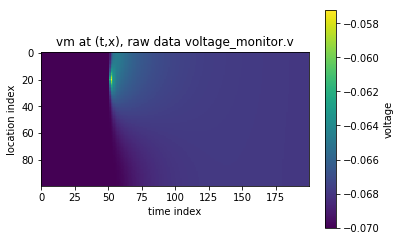

In [2]:
import numpy as np
import brian2 as b2
import matplotlib.pyplot as plt
from neurodynex.cable_equation import passive_cable
from neurodynex.tools import input_factory
import pylab
b2.defaultclock.dt = 0.01 * b2.ms
passive_cable.getting_started()   #first graph is due to the plt.show() in default function


# 5.1. Exercise: spatial and temporal evolution of a pulse input

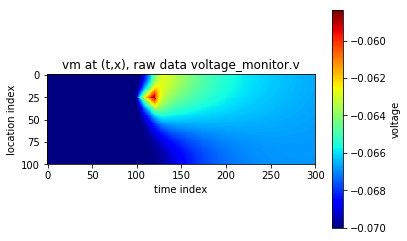

In [4]:
current = input_factory.get_step_current(10, 11, unit_time=0.1*b2.ms, amplitude=0.8* b2.namp)
voltage_monitor, cable_model = passive_cable.simulate_passive_cable(
    length=0.8 * b2.mm, current_injection_location=[0.2 * b2.mm], input_current=current,
    nr_compartments=100, simulation_time=3 * b2.ms)
c=plt.pcolor(voltage_monitor.v / b2.volt,cmap='jet')
plt.imshow(voltage_monitor.v / b2.volt)
plt.colorbar(c,label="voltage")
plt.xlabel("time index")
plt.ylabel("location index")
plt.title("vm at (t,x), raw data voltage_monitor.v")
plt.show() 

In [5]:
"""5.1.1"""
v_max = np.max(voltage_monitor.v)
time_loc = np.where(voltage_monitor.v  == np.max(voltage_monitor.v))
print(v_max)
print("Location:" + str(time_loc[0][0]))
print("Time:" + str(time_loc[1][0]*0.01*b2.ms))  #here time index is multiplied by 0.01 since each time step is equal to 0.01ms

-58.38596441 mV
Location:25
Time:1.2 ms


Text(0,0.5,'Voltage in volts')

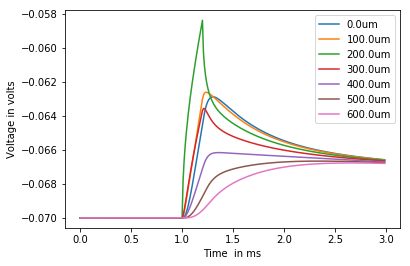

In [6]:
"""5.1.2"""
locations=np.arange(0,700,100)*b2.um
for loc in locations:
    v= voltage_monitor[cable_model.morphology[loc]].v
    plt.plot(voltage_monitor.t/b2.ms,v/b2.volt,label = str(loc/b2.um)+"um")
plt.legend()
plt.xlabel("Time  in ms")
plt.ylabel("Voltage in volts")




"""The voltage is maximum at the point where and when current is injected .
Voltage is initially same at all points in the cable until current is injected at t = 1ms.
As time passes the voltage also decreases and reaches a steady state at every point .
"""


Text(0,0.5,'Voltage in volts')

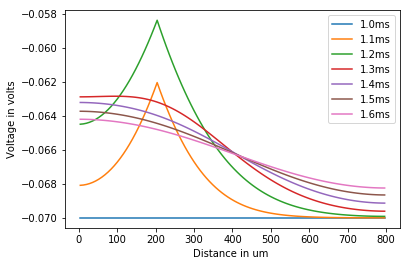

In [8]:
"""5.1.3"""
times = [1.0,1.1,1.2,1.3,1.4,1.5,1.6]
time= [np.int(x/0.01) for x in times ]  #Since time step = 0.01 * b2.ms,we multiply each time to it to get the index value for time 
for t in time:
    plt.plot(cable_model.distance*10**6,voltage_monitor.v[:,t],label=str(t*0.01)+"ms")    #we multiply by 10^6 to get length in micrometer  
plt.legend()   
plt.xlabel("Distance in um ")
plt.ylabel("Voltage in volts")

"""The current input takes time to show its effect.The voltage starts 
increasing from 1.2 sec and reaches maximum and  then decreases."""



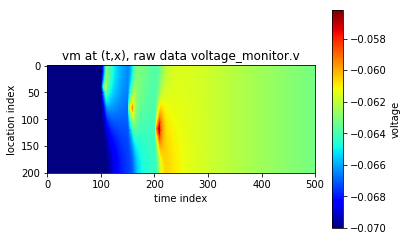

In [12]:
t_spikes = [10, 15, 20]                       #giving time
l_spikes = [100. * b2.um, 200. * b2.um, 300. * b2.um]   #giving location
current = input_factory.get_spikes_current(t_spikes, 100*b2.us, 0.8*b2.namp, append_zero=True)
voltage_monitor1, cable_model = passive_cable.simulate_passive_cable(current_injection_location=l_spikes, input_current=current,simulation_time = 5*b2.ms)
plt.figure()
plt.imshow(voltage_monitor1.v / b2.volt)
plt.colorbar(plt.pcolor(voltage_monitor1.v / b2.volt,cmap='jet'),label="voltage")  #plotting the required plot
plt.xlabel("time index")
plt.ylabel("location index")
plt.title("vm at (t,x), raw data voltage_monitor.v")
plt.show()


-61.49857714 mV


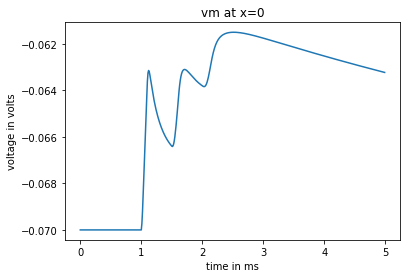

In [13]:
"""5.2.1"""
plt.plot(voltage_monitor1.t/b2.ms,voltage_monitor1[cable_model.morphology[0*b2.um]].v/b2.volt) #setting up soma
plt.xlabel("time in ms")
plt.ylabel("voltage in volts")
plt.title("vm at x=0")
val =max((voltage_monitor1[cable_model.morphology[0*b2.um]].v)) 
print(val)

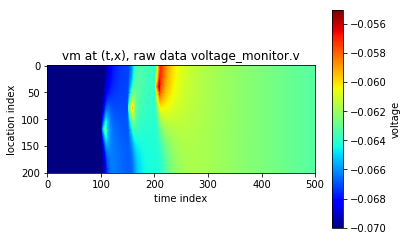

-57.16798956 mV


In [14]:
"""5.2.2"""
b2.defaultclock.dt = 0.01 * b2.ms
t_spikes = [10, 15, 20]
l_spikes = [300. * b2.um, 200. * b2.um, 100. * b2.um]   #reversing the locations
current = input_factory.get_spikes_current(t_spikes, 100*b2.us, 0.8*b2.namp, append_zero=True)
voltage_monitor2, cable_model = passive_cable.simulate_passive_cable(current_injection_location=l_spikes, input_current=current,simulation_time = 5*b2.ms)
plt.figure()
plt.imshow(voltage_monitor2.v / b2.volt)
plt.colorbar(plt.pcolor(voltage_monitor2.v / b2.volt,cmap='jet'),label="voltage")
plt.xlabel("time index")
plt.ylabel("location index")
plt.title("vm at (t,x), raw data voltage_monitor.v")
plt.show()
val =max((voltage_monitor2[cable_model.morphology[0*b2.um]].v)) 
print(val)

-61.49857714 mV
-57.16798956 mV


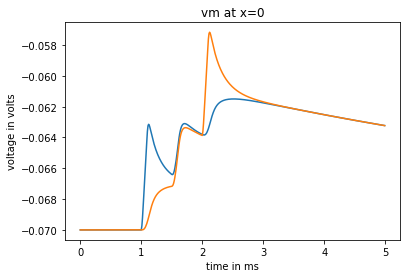

In [15]:
plt.plot(voltage_monitor1.t/b2.ms,voltage_monitor1[cable_model.morphology[0*b2.um]].v/b2.volt) #setting up soma
plt.xlabel("time in ms")
plt.ylabel("voltage in volts")
plt.title("vm at x=0")
val =max((voltage_monitor1[cable_model.morphology[0*b2.um]].v)) 
print(val)
plt.plot(voltage_monitor2.t/b2.ms,voltage_monitor2[cable_model.morphology[0*b2.um]].v/b2.volt) #setting up soma
plt.xlabel("time in ms")
plt.ylabel("voltage in volts")
plt.title("vm at x=0")
val =max((voltage_monitor2[cable_model.morphology[0*b2.um]].v)) 
print(val)


"""As can be seen in model2 current is first injected at 300um and thus takes time to show its effect at location 0um 
whereas when injecting current at x=100um it shows immediate effect on soma"""

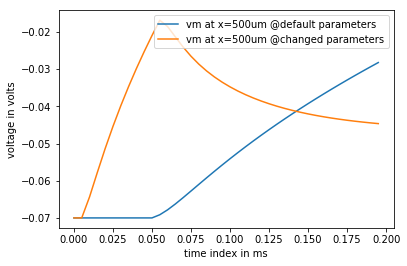

In [17]:
"""5.3.1"""


b2.defaultclock.dt = 0.005 * b2.ms

membrane_resistance_1 = 1.25 * b2.Mohm * b2.mm ** 2
membrane_capacitance_1 = 0.8 * b2.uF / b2.cm ** 2


membrane_resistance_2 = 5.0 * b2.Mohm * b2.mm ** 2
membrane_capacitance_2 = 0.2 * b2.uF / b2.cm ** 2



#with parameter set 1
current = input_factory.get_step_current(5, 51, unit_time=0.01*b2.ms, amplitude=3. * b2.namp) #time unit changed to 0.01 since we need to inh=ject current at time 0.05,the current injected is 3namp (self chosen)
voltage_monitor, cable_model = passive_cable.simulate_passive_cable(length=0.5 * b2.mm, current_injection_location=[0.4* b2.mm], input_current=current,
    nr_compartments=10, simulation_time=0.2 * b2.ms)
# provide a minimal plot
plt.plot(voltage_monitor.t/b2.ms,voltage_monitor.v[-1,:]/b2.volt,label="vm at x=500um @default parameters")
plt.xlabel("time index in ms")
plt.ylabel("voltage in volts")



#with parameter set 2
current = input_factory.get_step_current(5, 51, unit_time=b2.us, amplitude=3. * b2.namp)
voltage_monitor, cable_model = passive_cable.simulate_passive_cable(
    length=0.5 * b2.mm, current_injection_location=[0.4 * b2.mm], input_current=current,
    nr_compartments=10, simulation_time=0.2 * b2.ms,r_transversal=membrane_resistance_2,capacitance=membrane_capacitance_2)
# provide a minimal plot
plt.plot(voltage_monitor.t/b2.ms,voltage_monitor.v[-1,:]/b2.volt,label="vm at x=500um @changed parameters")
plt.xlabel("time index in ms")
plt.ylabel("voltage in volts")
plt.legend()


"""In the model with high resistance and less capacitence,the time when current is injected shows high voltage whereas it is opposite in the other case"""

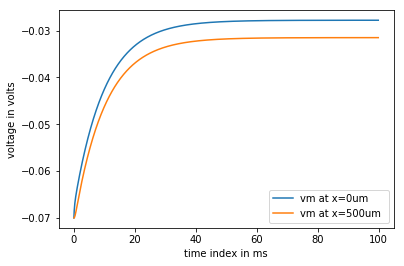

In [18]:
"""5.4.1"""
sim_time= 100*b2.ms
N_comp = 20
b2.defaultclock.dt = 0.1 * b2.ms   #since we changed it for last question,we again reset it 

current = input_factory.get_step_current(0, 0, unit_time=b2.ms, amplitude=0.1 * b2.namp, append_zero=False)
voltage_monitor, cable_model = passive_cable.simulate_passive_cable(length=0.5 * b2.mm, current_injection_location = [0*b2.um],
input_current=current, simulation_time=sim_time, nr_compartments=N_comp)

#two plots are drawn for x=0um and x=500um
plt.plot(voltage_monitor.t/b2.ms,voltage_monitor.v[0,:]/b2.volt,label="vm at x=0um ")
plt.xlabel("time index in ms")
plt.ylabel("voltage in volts")
plt.plot(voltage_monitor.t/b2.ms,voltage_monitor.v[-1,:]/b2.volt,label="vm at x=500um ")
plt.xlabel("time index in ms")
plt.ylabel("voltage in volts")
plt.legend()


Text(0,0.5,'Voltage in volts')

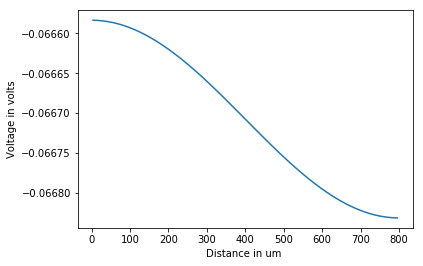

In [23]:
plt.plot(cable_model.distance*10**6,voltage_monitor.v[:,-1])   #--1 is used since  the last time index  is used 
plt.xlabel("Distance in um ")
plt.ylabel("Voltage in volts")

In [32]:
import math
e=2.718
val = voltage_monitor.v[0,0]/e
print(voltage_monitor.v[0,0])
print(val)
lambda_graph =np.where(voltage_monitor.v[:,:]==val)

R_LONGITUDINAL = 0.5 * b2.kohm * b2.mm  
R_TRANSVERSAL = 1.25 * b2.Mohm * b2.mm ** 2 
lambda_cal = math.sqrt(R_TRANSVERSAL/R_LONGITUDINAL)
print(lambda_graph,lambda_cal)


-70. mV
-25.75423105 mV
((array([], dtype=int64), array([], dtype=int64)), 1.5811388300841898)
